In [50]:
'''
K-nearest neighbors:
- supervised and non parametric learning algorithm.
- k ---> number of nearest datapoints
- usually 5 nearest datapoints used.
- Euclidean distance determines final class

'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [5]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Text(0, 0.5, 'Sepal width')

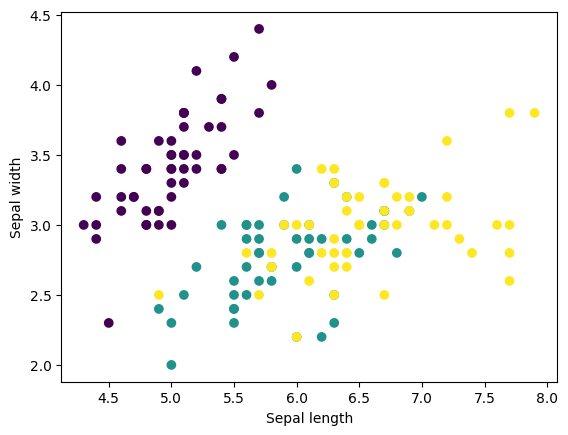

In [25]:
# scatter plot between Sepal Height and Width.
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [36]:
X = df.drop(['target', 'flower_name'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
# 96% accuracy
knn.score(X_train, y_train)

0.9619047619047619

In [47]:
predictions = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]])

Text(50.722222222222214, 0.5, 'truth')

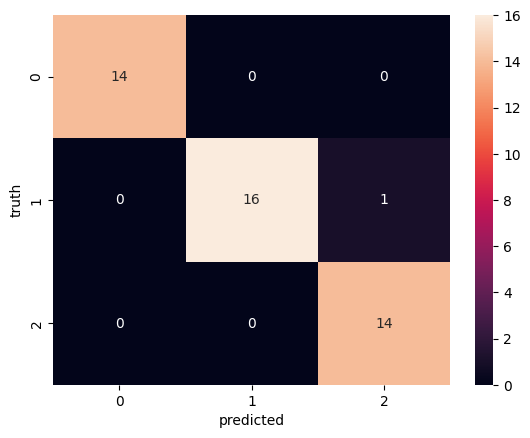

In [49]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

